# 遷移學習

In [1]:
import glob, os
train_path = 'D:\Python_Summarize\Ace_Pycharm_Project\Ace_Deep_Learning/train'
cats_fn = glob.glob(os.path.join(train_path, 'cat.*.jpg'))
dogs_fn = glob.glob(os.path.join(train_path, 'dog.*.jpg'))

In [2]:
cats_fn

['D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.0.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.1.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.100.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.1000.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10000.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10001.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10002.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10003.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10004.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\cat.10005.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train

In [3]:
dogs_fn

['D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.0.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.1.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.100.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.1000.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10000.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10001.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10002.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10003.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10004.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train\\dog.10005.jpg',
 'D:\\Python_Summarize\\Ace_Pycharm_Project\\Ace_Deep_Learning/train

In [4]:
# 將貓設成0，狗設成1
cats_ans = [0]*len(cats_fn)
dogs_ans = [1]*len(dogs_fn)

In [5]:
import pandas as pd
df = pd.DataFrame({
    'path': cats_fn + dogs_fn,
    'ans': cats_ans + dogs_ans
})

df

,path,ans
0,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,0
1,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,0
2,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,0
3,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,0
4,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,0
...,...,...
24995,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,1
24996,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,1
24997,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,1
24998,D:\Python_Summarize\Ace_Pycharm_Project\Ace_De...,1


In [6]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3)) 

# 參數說明：
# 模型要改成自己的MLP，所以include_top務必設成False
# input_shape：The default input size for this model is 224x224

vgg.summary() # 這是完整版VGG16

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
vgg.input # Tensor

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [8]:
vgg.output # Tensor

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

In [9]:
vgg.layers # 資料型態: list

In [10]:
# 僅訓練MLP的參數，其他參數(含CNN)全部固定。
# 觀念：trainable一定要在compile前設置
for layer in vgg.layers: layer.trainable=False # 使參數不可被訓練


In [11]:
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers import BatchNormalization
# Batch Normalization: 最佳化Normalization，新的平均、新的標準差由網路調整出來。

x = BatchNormalization()(vgg.output)
x = Flatten()(x) # Tensor
x

<tf.Tensor 'flatten/Identity:0' shape=(None, 25088) dtype=float32>

In [12]:
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(2, activation='softmax')(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
'''
原本(尚未Batch Normalization):
Total params: 27,561,282
Trainable params: 12,846,594
Non-trainable params: 14,714,688

Batch Normalization後:
Total params: 27,563,330
Trainable params: 12,847,618
Non-trainable params: 14,715,712

batch_normalization層的Param為2048，代表原本的平均與標準差+新的平均與標準差，每一個特徵要算自己的平均與標準差，所以是512*4=2048
Trainable params相差1024，代表新的平均與標準差，每一個特徵都有自己的合理平均與標準差，所以是512*2=1024
Non-trainable params相差1024，代表原本的平均與標準差，每一個特徵都有自己的平均與標準差，所以是512*2=1024

'''

'\n原本(尚未Batch Normalization):\nTotal params: 27,561,282\nTrainable params: 12,846,594\nNon-trainable params: 14,714,688\n\nBatch Normalization後:\nTotal params: 27,563,330\nTrainable params: 12,847,618\nNon-trainable params: 14,715,712\n\nbatch_normalization層的Param為2048，代表原本的平均與標準差+新的平均與標準差，每一個特徵要算自己的平均與標準差，所以是512*4=2048\nTrainable params相差1024，代表原本的平均與標準差，每一個特徵都有自己的平均與標準差，所以是512*2=1024\nNon-trainable params相差1024，代表新的平均與標準差，每一個特徵都有自己的合理平均與標準差，所以是512*2=1024\n'

In [14]:
cnn.compile(loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

In [15]:
# 安裝pillow(PIL)套件
# !pip install Pillow

In [16]:
# VGG16的框架為Caffe (數值為-127.5~127.5或0~255)
# 順便偷 preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
import numpy as np

img = load_img(os.path.join(train_path, 'cat.10000.jpg'), target_size=(224, 224)) # target_size: 轉換成跟ImageNet一樣的大小(224, 224)
img_np = np.array(img).astype('float64') # 轉成小數
img_np

array([[[  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        ...,
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.]],

       [[  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        ...,
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.]],

       [[  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        ...,
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.]],

       ...,

       [[ 82.,  15.,   7.],
        [ 87.,  19.,  18.],
        [ 82.,  16.,  20.],
        ...,
        [ 27.,   8.,  10.],
        [ 28.,   8.,  10.],
        [ 29.,   7.,  10.]],

       [[ 77.,  13.,   3.],
        [ 84.,  20.,  18.],
        [ 85.,  20.,  24.],
        ...,
        [ 21.,   9.,   9.],
        [ 23.,   9.,   9.],
        [ 26.,   7.,   9.]],

       [[ 94.,  32.,  19.],
        [100.,  39.,  34.],
        [ 80.,  

In [17]:
img_pre = preprocess_input(img_np)
img_pre

array([[[ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        ...,
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ]],

       [[ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        ...,
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ]],

       [[ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        ...,
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ],
        [ -95.939, -108.779, -115.68 ]],

       ...,

       [[ -96.939, -101.779,  -41.68 ],
        [ -85.939,  -97.779,  -36.68 ],
        [ -83.939, -100.779,  -41.68 ],
        ...,
        [ -93.939, -108.779,  -96.68 ],
        [ -93.939, -108.779,  -95.68 ],
        [

## 練習 ##

In [18]:
'''
# 開始處理資料，請使用 numpy array
x = np.array(df['path'])
y = np.array(df['ans'])
batch = 10

# random.randint(下限, 上限)
# np.random.randint(下限, 上限+1, 你要多少個batch)
idx = np.random.randint(0, len(x)+1, batch)
paths = x[idx]
paths
'''

"\n# 開始處理資料，請使用 numpy array\nx = np.array(df['path'])\ny = np.array(df['ans'])\nbatch = 10\n\n# random.randint(下限, 上限)\n# np.random.randint(下限, 上限+1, 你要多少個batch)\nidx = np.random.randint(0, len(x)+1, batch)\npaths = x[idx]\npaths\n"

In [19]:
'''
targets = y[idx]
targets
'''

'\ntargets = y[idx]\ntargets\n'

## 繼續正式處理資料 ##

In [20]:
# 改用自定義的def
def get_imgs(x, y, batch): # return_value: (原始圖片list, 訓練圖片list, 答案list)
    # 開始處理資料，請轉成 numpy array
    x = np.array(x)
    y = np.array(y)
    
    # random.randint(下限, 上限)
    # np.random.randint(下限, 上限+1, 你要多少個batch)
    idx = np.random.randint(0, len(x)+1, batch)
    paths = x[idx]
    targets = y[idx]
    
    ori_imgs = list()
    pre_imgs = list()

    for path in paths:
        img = load_img(path, target_size=(224, 224)) # target_size: 轉換成跟ImageNet一樣的大小(224, 224)
        img_np = np.array(img).astype('float64')
        img_pre = preprocess_input(img_np)
        ori_imgs.append(img_np)
        pre_imgs.append(img_pre)
    
    return (np.array(ori_imgs), np.array(pre_imgs), np.array(targets)) 

get_imgs(df['path'], df['ans'], 10)

(array([[[[  43.32 ,   53.221,   81.061],
          [  44.32 ,   53.221,   81.061],
          [  47.32 ,   56.221,   84.061],
          ...,
          [  46.32 ,   63.221,   88.061],
          [  46.32 ,   63.221,   88.061],
          [  46.32 ,   62.221,   90.061]],
 
         [[  50.32 ,   60.221,   88.061],
          [  46.32 ,   55.221,   83.061],
          [  46.32 ,   55.221,   83.061],
          ...,
          [  47.32 ,   63.221,   91.061],
          [  47.32 ,   63.221,   93.061],
          [  47.32 ,   63.221,   93.061]],
 
         [[  53.32 ,   66.221,   93.061],
          [  48.32 ,   58.221,   86.061],
          [  48.32 ,   57.221,   85.061],
          ...,
          [  45.32 ,   60.221,   92.061],
          [  45.32 ,   60.221,   92.061],
          [  45.32 ,   60.221,   94.061]],
 
         ...,
 
         [[ -10.68 ,    0.221,   25.061],
          [ -10.68 ,    0.221,   25.061],
          [ -10.68 ,   -1.779,   24.061],
          ...,
          [   1.32 ,   12.221,   

In [21]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # One-Hot-Encoding

x_train, x_test, y_train, y_test = train_test_split(np.array(df['path']), np.array(df['ans']), test_size=0.2)

# 若y_test完全都是0，to_categorical就會轉錯，所以需要帶入第二個參數－num_classes。
# num_classes: 总类别数；此處設定為2，代表2種。
y_train_categorical = to_categorical(y_train, num_classes=2)
print(y_train[0], y_train_categorical[0])
y_train_categorical

1 [0. 1.]


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [22]:
y_test_categorical = to_categorical(y_test, num_classes=2)
print(y_test[0], y_test_categorical[0])
y_test_categorical

1 [0. 1.]


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [23]:
# train_on_batch: 自訂訓練流程
batch = 100
for i in range(10):
    _, x, y = get_imgs(x_train, y_train_categorical, batch)
    loss = cnn.train_on_batch(x, y)
    print(f'第{i}次, [Train Loss]: {loss}') # [loss, accuracy正確率]
    _, x, y = get_imgs(x_test, y_test_categorical, batch)
    loss = cnn.test_on_batch(x, y) 
    print(f'第{i}次, [Test Loss]: {loss}') # [loss, accuracy正確率]

第0次, [Train Loss]: [1.732537865638733, 0.4699999988079071]
第0次, [Test Loss]: [10.299954414367676, 0.7699999809265137]
第1次, [Train Loss]: [11.925915718078613, 0.4399999976158142]
第1次, [Test Loss]: [8.638854026794434, 0.8299999833106995]
第2次, [Train Loss]: [3.342897653579712, 0.699999988079071]
第2次, [Test Loss]: [4.681023120880127, 0.8700000047683716]
第3次, [Train Loss]: [0.7300943732261658, 0.8899999856948853]
第3次, [Test Loss]: [6.6078338623046875, 0.8999999761581421]
第4次, [Train Loss]: [0.6658498644828796, 0.9300000071525574]
第4次, [Test Loss]: [5.771909713745117, 0.8999999761581421]
第5次, [Train Loss]: [0.05871003493666649, 0.9800000190734863]
第5次, [Test Loss]: [12.042144775390625, 0.7900000214576721]
第6次, [Train Loss]: [0.04197702929377556, 0.9800000190734863]
第6次, [Test Loss]: [3.449990749359131, 0.9100000262260437]
第7次, [Train Loss]: [0.17478322982788086, 0.9399999976158142]
第7次, [Test Loss]: [2.164360761642456, 0.9599999785423279]
第8次, [Train Loss]: [0.6257534027099609, 0.83999997377

In [24]:
# 預測機率 → 僅能趨近於0或趨近於1，但不可以等於0或等於1
cnn.predict(x)

array([[1.00000000e+00, 1.21816917e-16],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.64572372e-10],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.30314732e-18],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.38155361e-13],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.611628

In [25]:
imgs, test_x, test_y = get_imgs(x_test, y_test_categorical, batch=1000) # return_value: (原始圖片list, 訓練圖片list, 答案list)
cnn.evaluate(test_x, test_y)

32/32 [==============================] - 70s 2s/step - loss: 4.0748 - accuracy: 0.9110


[4.074753284454346, 0.9110000133514404]

In [26]:
# Model: 若不是用Sequential，沒有predict_classes可以用，要改用predict+argmax(axis=1)。
cnn.predict(x).argmax(axis=1) # 找到最大值的index

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

## 驗證&畫圖 ##

In [33]:
predict_test_x = cnn.predict(test_x).argmax(axis=1) # 找到最大值的index
predict_test_x

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
target_test_y = test_y.argmax(axis=1)
target_test_y

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

預測錯誤：89


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

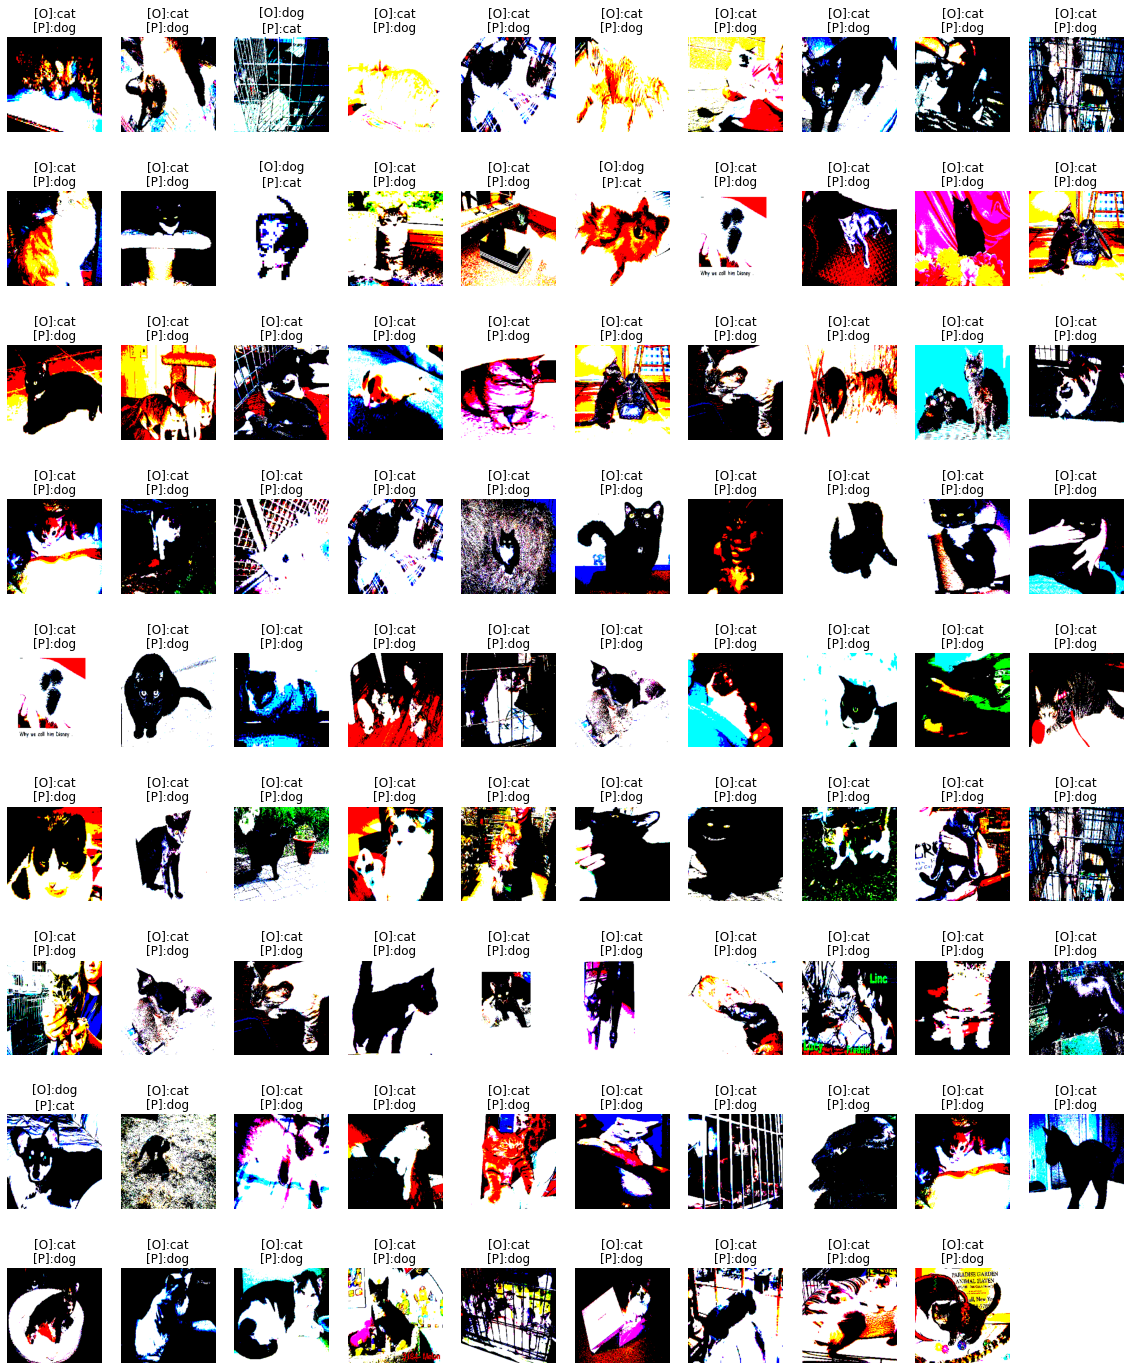

In [46]:
# 畫圖
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

labels = ["cat", "dog"] # 將貓設成0，狗設成1
idx = np.nonzero(predict_test_x != target_test_y)[0]
false_img = imgs[idx]
false_answer = target_test_y[idx]
false_pre = predict_test_x[idx]

print('預測錯誤：' + str(len(idx)))
width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(20, 25))

for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)